In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

In [2]:
data_abalone = pd.read_csv('Desktop/abalone.csv')
data_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Probing the data and cloumns

In [3]:
data_abalone.isnull().values.sum()

0

Checking if there are any missing values, there are none.

In [4]:
data_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Checking some basic statistics of the data.

<AxesSubplot:>

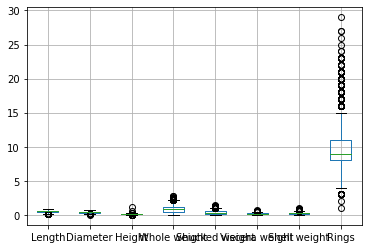

In [5]:
data_abalone.boxplot()

This is the boxplot of all columns, we can see that two of those have many out liers, lets probe those.

<AxesSubplot:>

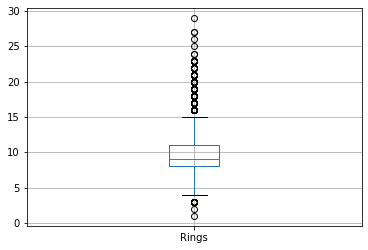

In [6]:
data_abalone.boxplot(column='Rings')

Rings column has some outliers, but it is okay to keep them as they dont skey the data too much.

array([[<AxesSubplot:title={'center':'Rings'}>]], dtype=object)

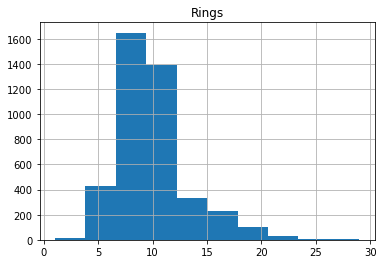

In [7]:
data_abalone.hist(column = 'Rings')

Checking the distribution of Rings, and setting a benchmark for good good age to harvest at.

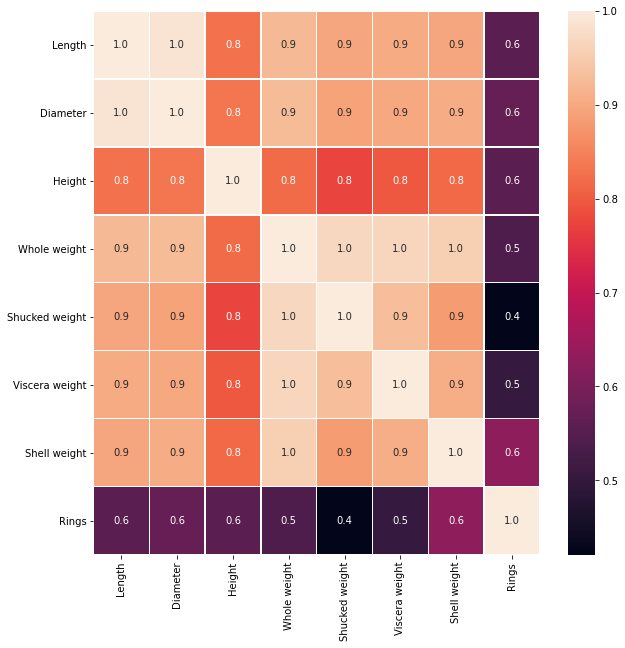

In [8]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_abalone.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### I've added a heat map to see which elements are the most related to Rings of the alabone, which proportianally relates to the age of the alabone.

In [9]:
df_sex = data_abalone['Sex'].value_counts()
print(df_sex.head())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


Checking the data of various sex, it shows that the distribution is equal and we caan ignore this axis.)

In [10]:
data_abalone.drop('Sex', axis = 1, inplace = True)
data_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


So I removed that coulumn

In [11]:
data_abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Checking the distribution of rings.

In [12]:
data_abalone['Rings'].mean()

9.933684462532918

above we got the mean of rings which we will now use

In [13]:
binary =[]
for i in data_abalone['Rings']:
    if  i > 10:
        binary.append('1')
    elif i <= 10:
        binary.append('0')
data_abalone['Farm'] = binary

I have created a new variable Farm, which replaces the rings mean variable and converts it into binary. any alabone with rings 10 or greator is given the number 1, and rings below are given the number 0. this way we can easily train out algorithms.

In [14]:
data_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Farm
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [15]:
del data_abalone['Rings']

In [16]:
data_abalone['Farm'].value_counts()

0    2730
1    1447
Name: Farm, dtype: int64

Checking how the ratio of 'to farm it is young i.e. 0' and 'we can farm it now i.e. 1'.

In [17]:
data_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Farm
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [18]:
x = data_abalone.iloc[:,:7]
y = data_abalone['Farm']

Now I separate the data as what is the training variable, that is 'Farm'.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

Adding some useful imports for ML

In [20]:
print(X)

[[-0.57455813 -0.43214879 -1.06442415 ... -0.60768536 -0.72621157
  -0.63821689]
 [-1.44898585 -1.439929   -1.18397831 ... -1.17090984 -1.20522124
  -1.21298732]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.4634999  -0.35668983
  -0.20713907]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.74855917  0.97541324
   0.49695471]
 [ 0.84118198  0.77718745  0.25067161 ...  0.77334105  0.73362741
   0.41073914]
 [ 1.54905203  1.48263359  1.32665906 ...  2.64099341  1.78744868
   1.84048058]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

I have chosen to split the train:test data as 0.8:0.2

### Decision tree algorithm

In [22]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1340
           1       0.62      0.56      0.59       749

    accuracy                           0.72      2089
   macro avg       0.69      0.68      0.69      2089
weighted avg       0.71      0.72      0.72      2089



### Random Forest algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1340
           1       0.75      0.60      0.66       749

    accuracy                           0.78      2089
   macro avg       0.77      0.74      0.75      2089
weighted avg       0.78      0.78      0.78      2089



### AdaBoost algorithm

In [24]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1340
           1       0.76      0.54      0.63       749

    accuracy                           0.77      2089
   macro avg       0.77      0.72      0.73      2089
weighted avg       0.77      0.77      0.76      2089



### Gradient boosting algorithm

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1340
           1       0.74      0.58      0.65       749

    accuracy                           0.78      2089
   macro avg       0.76      0.73      0.74      2089
weighted avg       0.77      0.78      0.77      2089



## Now I will find the training score and testing score for each algorithm use and plot it

In [26]:

lr_train_acc_1 = model1.score(X_train, y_train)
print('Training Score: ', lr_train_acc_1)
lr_test_acc_1 = model1.score(X_test, y_test)
print('Testing Score: ', lr_test_acc_1)

Training Score:  1.0
Testing Score:  0.7185256103398755


In [27]:

lr_train_acc_2 = model2.score(X_train, y_train)
print('Training Score: ', lr_train_acc_2)
lr_test_acc_2 = model2.score(X_test, y_test)
print('Testing Score: ', lr_test_acc_2)

Training Score:  0.9995210727969349
Testing Score:  0.7826711345141216


In [28]:

lr_train_acc_3 = model3.score(X_train, y_train)
print('Training Score: ', lr_train_acc_3)
lr_test_acc_3 = model3.score(X_test, y_test)
print('Testing Score: ', lr_test_acc_3)

Training Score:  0.8026819923371648
Testing Score:  0.7740545715653423


In [29]:

lr_train_acc_4 = model4.score(X_train, y_train)
print('Training Score: ', lr_train_acc_4)
lr_test_acc_4 = model4.score(X_test, y_test)
print('Testing Score: ', lr_test_acc_4)

Training Score:  0.8568007662835249
Testing Score:  0.7754906653901388


We have all the useful data.

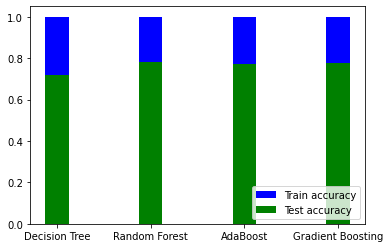

In [30]:
x = ['Decision Tree','Random Forest', 'AdaBoost','Gradient Boosting']
y1 = [lr_train_acc_1, lr_train_acc_1, lr_train_acc_1, lr_train_acc_1]
y2 = [lr_test_acc_1, lr_test_acc_2, lr_test_acc_3, lr_test_acc_4]

X = np.arange(4)
plt.bar(x, y1, color = 'b', width = .25)
plt.bar(x, y2, color = 'g', width = .25)
plt.legend(["Train accuracy", "Test accuracy"], loc ="lower right")


plt.show()

### accuracy graph

We can conclude that we should use **Random forest algorith** to predict future results regarding age of an abalone. as we achieved:

**Training Score:  0.9995210727969349**

**Testing Score:  0.7826711345141216**

the highest of the all.